In [1]:
from visual import *
from core import Parameter
from nn import *


In [2]:
a = Parameter(2)
b = 3
c = b+a*b

c.backward()
print(c)

Parameter: 9| Grad: 1.0 | Children: {Parameter: 3| Grad: 1.0 | Children: set(), Parameter: 6| Grad: 1.0 | Children: {Parameter: 2| Grad: 3.0 | Children: set(), Parameter: 3| Grad: 2.0 | Children: set()}}


In [3]:
# Tests
a = Parameter(2)
b = 3
c = a+b
print(a)
print(c)
d = b+a
print(d)
e = a*b
print(e)
f = b*a
print(f)
g = a-b
print(g)
h = b-a
print(h)
i = a/b
print(i)
l = b/a
print(l)
m = -a
n = -b
print(m)
print(n)
o = (a**-2)
print(o)

Parameter: 2| Grad: 0.0 | Children: set()
Parameter: 5| Grad: 0.0 | Children: {Parameter: 3| Grad: 0.0 | Children: set(), Parameter: 2| Grad: 0.0 | Children: set()}
Parameter: 5| Grad: 0.0 | Children: {Parameter: 3| Grad: 0.0 | Children: set(), Parameter: 2| Grad: 0.0 | Children: set()}
Parameter: 6| Grad: 0.0 | Children: {Parameter: 2| Grad: 0.0 | Children: set(), Parameter: 3| Grad: 0.0 | Children: set()}
Parameter: 6| Grad: 0.0 | Children: {Parameter: 3| Grad: 0.0 | Children: set(), Parameter: 2| Grad: 0.0 | Children: set()}
Parameter: -1| Grad: 0.0 | Children: {Parameter: 2| Grad: 0.0 | Children: set(), Parameter: -3| Grad: 0.0 | Children: set()}
Parameter: 1| Grad: 0.0 | Children: {Parameter: -2| Grad: 0.0 | Children: {Parameter: 2| Grad: 0.0 | Children: set(), Parameter: -1| Grad: 0.0 | Children: set()}, Parameter: 3| Grad: 0.0 | Children: set()}
Parameter: 0.6666666666666666| Grad: 0.0 | Children: {Parameter: 2| Grad: 0.0 | Children: set(), Parameter: 0.3333333333333333| Grad: 0

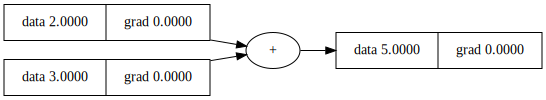

In [4]:
draw_dot(c)

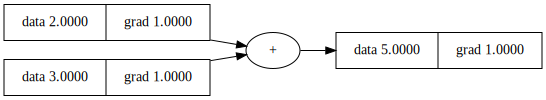

In [5]:
c.backward()
draw_dot(c)

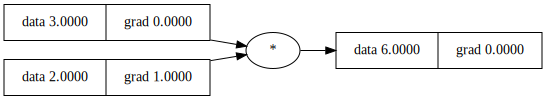

In [6]:
draw_dot(f)

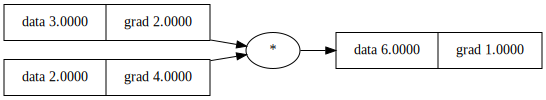

In [7]:
f.backward()
draw_dot(f)

In [8]:
z = h.tanh()
print(z)

Parameter: 0.761594155955765| Grad: 0.0 | Children: {Parameter: 1| Grad: 0.0 | Children: {Parameter: -2| Grad: 0.0 | Children: {Parameter: 2| Grad: 4.0 | Children: set(), Parameter: -1| Grad: 0.0 | Children: set()}, Parameter: 3| Grad: 0.0 | Children: set()}}


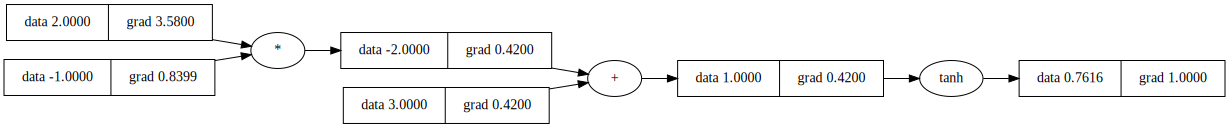

In [9]:
z.backward()
draw_dot(z)

Tanh_Neuron(4)


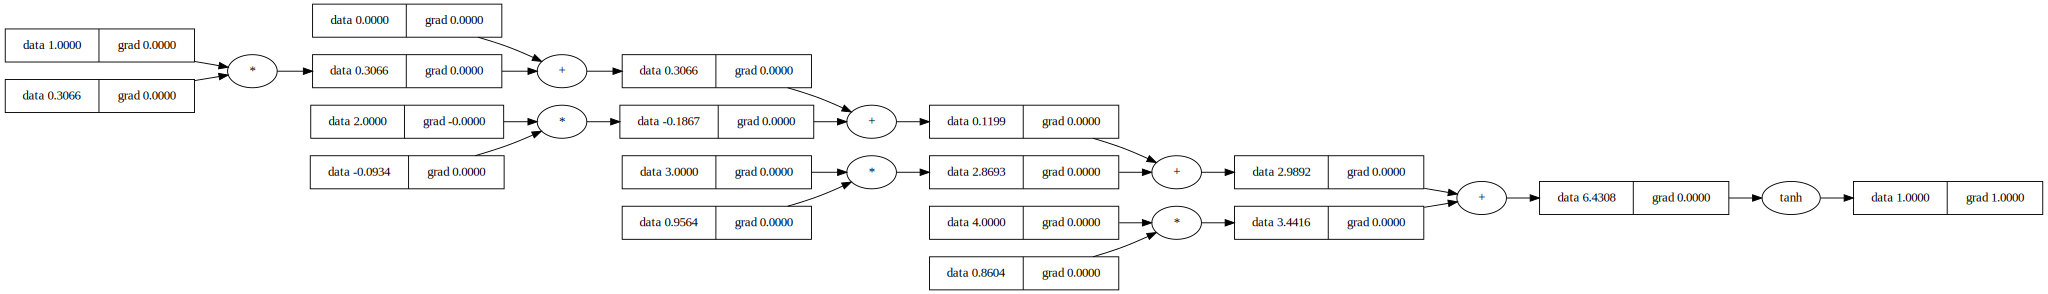

In [10]:
n = Neuron(4, act="tanh")
print(n)
dataset_x = [Parameter(1),Parameter(2),Parameter(3),Parameter(4)]
y = n(dataset_x)
y.backward()
w = draw_dot(y)
w

MLP of [Layer of [ReLU_Neuron(2), ReLU_Neuron(2), ReLU_Neuron(2), ReLU_Neuron(2)], Layer of [Linear_Neuron(4), Linear_Neuron(4)], Layer of [Linear_Neuron(2)]]


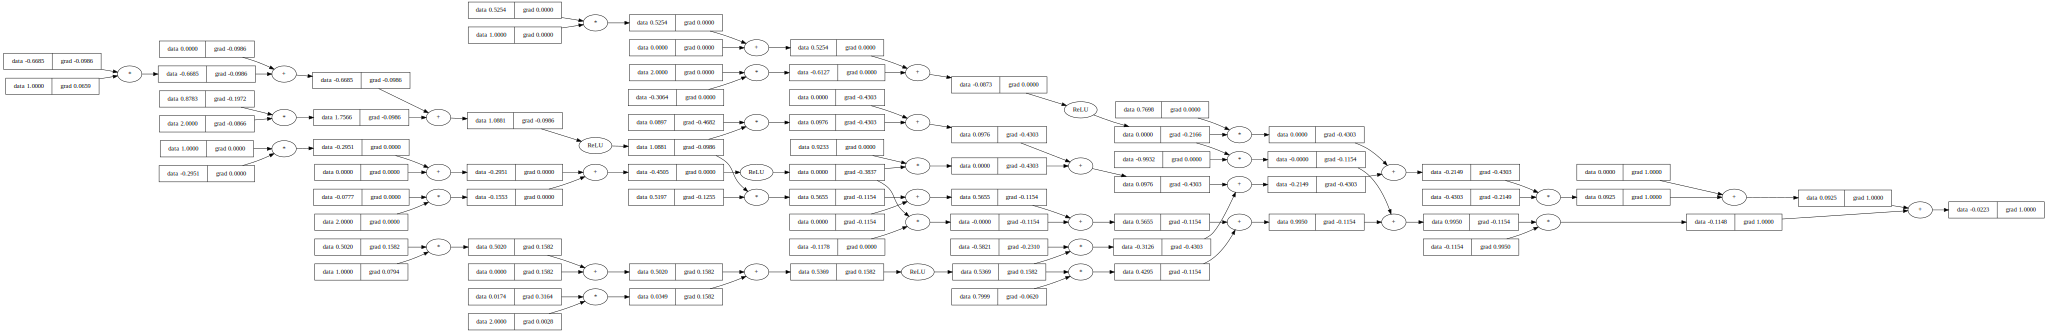

In [11]:
# MLP has in input the number of inputs after we have a list containing the number of neurons one for each layer, 
# then a list of different activation function one for each layer, None for linear layer 
m = MLP(2, [4, 2, 1], ["relu"])
print(m)
dataset_x = [1, 2]
#dataset_x = [Parameter(1),Parameter(2)]
out = m(dataset_x)
out.backward()
draw_dot(out)


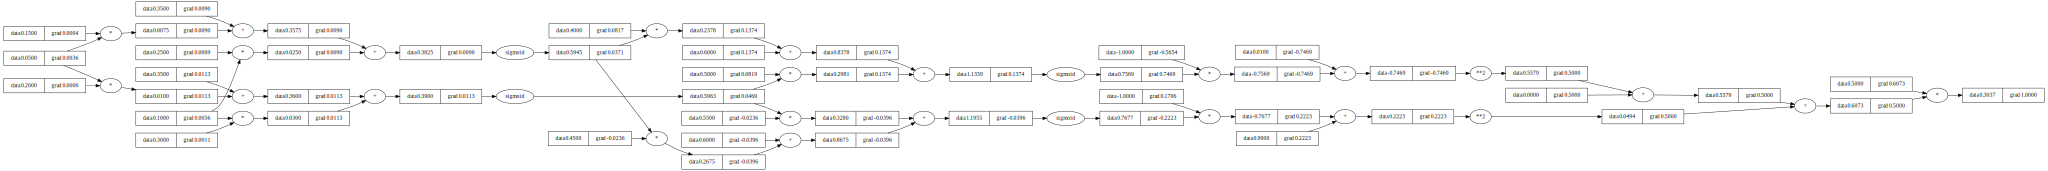

In [12]:
class Neuron(Module):
    def __init__(self, number_of_inputs, weights, act=None):
        self.w = [Parameter(w) for w in weights[0:2]]
        self.b = Parameter(weights[2])
        self.act = act

    def __call__(self, x):
        out = sum((wi * xi for wi, xi in zip(self.w, x)), start=self.b)
        return (
            out.relu()
            if self.act == "relu"
            else out.tanh()
            if self.act == "tanh"
            else out.sigmoid()
            if self.act == "sigmoid"
            else out.lrelu()
            if self.act == "lrelu"
            else out.c_softplus()
            if self.act == "c_softplus"
            else out.elu()
            if self.act == "elu"
            else out
        )

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        act = (
            "ReLU"
            if self.act == "relu"
            else "Tanh"
            if self.act == "tanh"
            else "Sigmoid"
            if self.act == "sigmoid"
            else "LReLU"
            if self.act == "lrelu"
            else "c_softplus"
            if self.act == "c_softplus"
            else "elu"
            if self.act == "elu"
            else "Linear"
        )
        return f"{act}_Neuron({len(self.w)})"

h1 = Neuron(2, [0.15, 0.25, 0.35], act="sigmoid")
h2 = Neuron(2, [0.2, 0.3, 0.35], act="sigmoid")
input = [Parameter(0.05), Parameter(0.1)]
a=h1(input)
b=h2(input)

o1 = Neuron(2, [0.4, 0.5, 0.6] ,act="sigmoid")
o2 = Neuron(2, [0.45, 0.55, 0.6], act="sigmoid")
input = [a,b]
c=o1(input)
d=o2(input)

target = [0.01, 0.99]
loss = sum((t - o) ** 2 for t, o in zip(target, [c, d])) / len(input)
loss.backward()
draw_dot(loss)


In [13]:
for x in [h1,h2,o1,o2]:
    for p in x.parameters():
        p.data += - 0.3 * p.grad

In [14]:
c=o1(input)
d=o2(input)

target = [0.01, 0.99]
loss = sum((t - o) ** 2 for t, o in zip(target, [c, d])) / len(input)

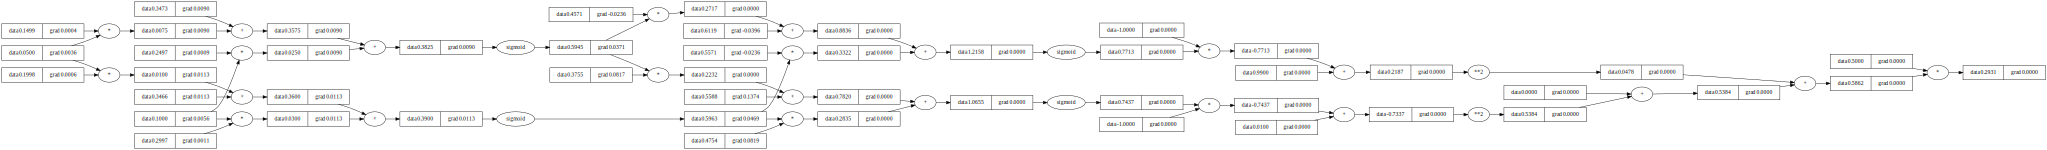

In [15]:
draw_dot(loss)

MLP of [Layer of [ReLU_Neuron(2), ReLU_Neuron(2), ReLU_Neuron(2), ReLU_Neuron(2)], Layer of [Linear_Neuron(4), Linear_Neuron(4)], Layer of [Linear_Neuron(2)]]


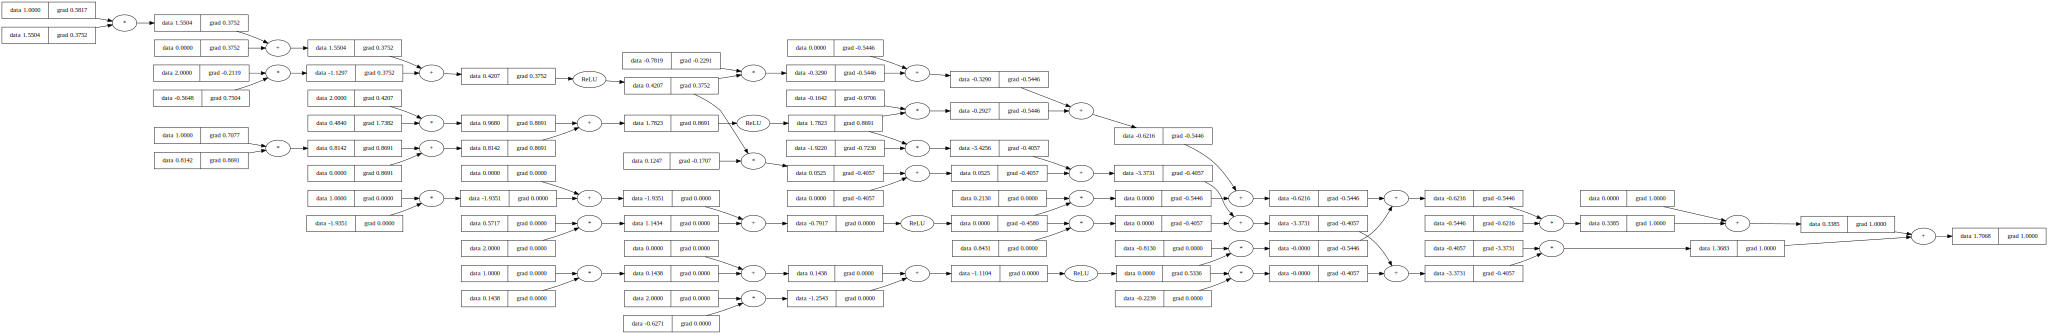

In [16]:
import random
# MLP has in input the number of inputs after we have a list containing the number of neurons one for each layer, 
# then a list of different activation function one for each layer, None for linear layer 

m = MLP(2, [4, 2, 1], ["relu"], random.gauss) # this support only distribution with 2 params for now (like mu and sigma) 
print(m)
dataset_x = [1, 2]
#dataset_x = [Parameter(1),Parameter(2)]
out = m(dataset_x)
out.backward()
draw_dot(out)
